<a href="https://colab.research.google.com/github/shamim237/ML-Handcrafted_Features/blob/main/HOG_RF_Bangla_Sign_Digit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle
from skimage.feature import hog
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
pick_in = open('/content/drive/MyDrive/Colab Notebooks/data_hog_sign(2).pickle', 'rb')
data = pickle.load(pick_in)
pick_in.close()

In [4]:
random.shuffle(data)
features = []
labels = []

In [5]:
for feature,label in data:
    features.append(feature)
    labels.append(label)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.11, shuffle=True)

In [7]:
clf = RandomForestClassifier().fit(x_train, y_train)

In [8]:
rf_pred = clf.predict(x_test)

In [9]:
pred_prob2 = clf.predict_proba(x_test)

In [10]:
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
rf_precision = precision_score(y_test, rf_pred, average= 'weighted')
rf_recall = recall_score(y_test, rf_pred, average= 'weighted')
print('Accuracy (Random Forest): ', "%.2f" % (rf_accuracy*100))
print('F1 (Random Forest): ', "%.2f" % (rf_f1*100))
print('Precision (k-NN): ', "%.2f" % (rf_precision*100))
print('Recall(k-NN): ', "%.2f" % (rf_recall*100))

Accuracy (Random Forest):  97.87
F1 (Random Forest):  97.87
Precision (k-NN):  97.87
Recall(k-NN):  97.87


In [11]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

[[ 81   0   0   0   0   1   0   0   0   0]
 [  0 112   0   0   0   0   0   0   0   0]
 [  0   0  84   0   0   0   0   0   2   0]
 [  0   2   2  80   1   0   0   0   0   0]
 [  0   0   0   5  93   0   0   0   0   0]
 [  0   0   0   0   3 105   0   0   0   0]
 [  0   0   0   0   0   0  89   0   0   0]
 [  0   1   0   0   0   0   1  78   0   0]
 [  0   0   0   0   0   1   0   1  92   0]
 [  0   0   0   0   0   0   0   0   0 104]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        82
           1       0.97      1.00      0.99       112
           2       0.98      0.98      0.98        86
           3       0.94      0.94      0.94        85
           4       0.96      0.95      0.95        98
           5       0.98      0.97      0.98       108
           6       0.99      1.00      0.99        89
           7       0.99      0.97      0.98        80
           8       0.98      0.98      0.98        94
           9       1.00     

Prediction is:  8


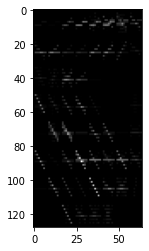

In [12]:
categories = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

print('Prediction is: ', categories[rf_pred[0]])

my_pred = x_test[0].reshape(128, 64)
plt.imshow(my_pred, cmap='binary_r')
plt.show()

In [13]:
n_classes= 10
from sklearn.metrics import roc_curve

fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

In [14]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [15]:
from sklearn.metrics import roc_auc_score

# auc scores
#auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2, multi_class="ovo")

print(auc_score2)

0.9986147961388402


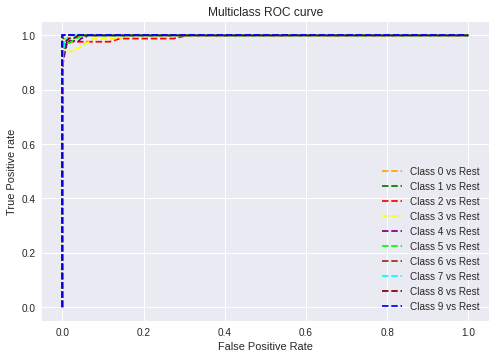

In [17]:
fpr = {}
tpr = {}
thresh ={}

n_class = 10

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob2[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='red', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='lime', label='Class 5 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='brown', label='Class 6 vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='cyan', label='Class 7 vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='maroon', label='Class 8 vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='--',color='blue', label='Class 9 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=400)

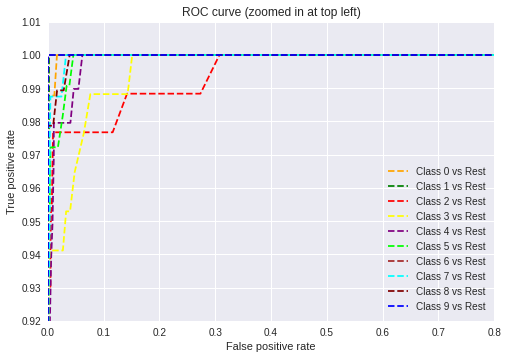

In [18]:
plt.figure(2)
plt.xlim(0, .8)
plt.ylim(0.92, 1.01)
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='red', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='lime', label='Class 5 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='brown', label='Class 6 vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='cyan', label='Class 7 vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='maroon', label='Class 8 vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='--',color='blue', label='Class 9 vs Rest')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

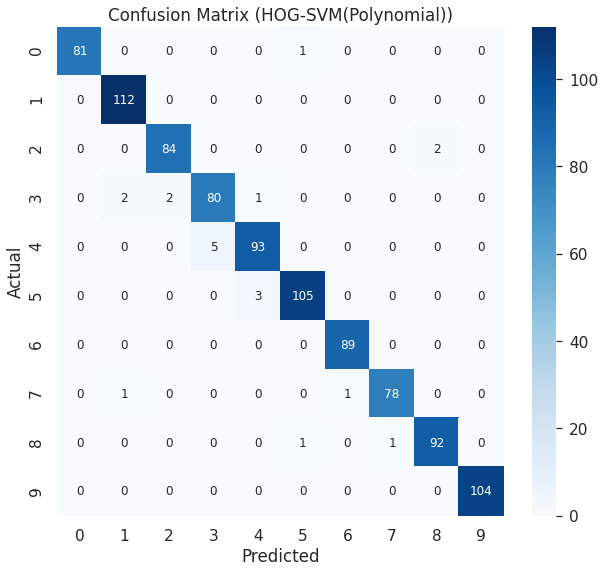

In [21]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


data = confusion_matrix(y_test, rf_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,9))
plt.title('Confusion Matrix (HOG-SVM(Polynomial))')
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True, fmt= 'g' ,annot_kws={"size": 12})# font size